# <font color='blue'>Programming Assignment: Image Representations</font>

In this problem, I will study how different representations of images can affect the performance of a nearest neighbor classifier.

I will experiment with CIFAR-10 data set, which has 50,000 training images and 10,000 test images, with ten different classes (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck). The images are in color, of size 32 × 32.

I will investigate the following representions:
1. Raw pixel space
2. Histogram-of-gradients (HOG) features
3. Convolutional Neural Network (CNN) features
    * Intermediate-level and high-level features extracted from a **pretrained** CNN 
    * Intermediate-level and high-level features extracted from a **randomly initialized** CNN 

In [6]:
pip install torch==1.7.1+cpu torchvision==0.8.2+cpu torchaudio===0.7.2 -f https://download.pytorch.org/whl/torch_stable.html


Looking in links: https://download.pytorch.org/whl/torch_stable.html
ERROR: Could not find a version that satisfies the requirement torch==1.7.1+cpu (from versions: 1.11.0, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 2.0.0, 2.0.1, 2.1.0)
ERROR: No matching distribution found for torch==1.7.1+cpu
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install torch

  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/ab/6a/0debe1ec3c63b1fd7487ec7dd8fb1adf19898bef5a8dc151265d79ffd915/torch-2.1.0-cp310-none-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for filelock from https://files.pythonhosted.org/packages/5e/5d/97afbafd9d584ff1b45fcb354a479a3609bd97f912f8f1f6c563cb1fae21/filelock-3.12.4-py3-none-any.whl.metadata
  Obtaining dependency information for typing-extensions from https://files.pythonhosted.org/packages/24/21/7d397a4b7934ff4028987914ac1044d3b7d52712f30e2ac7a2ae5bc86dd0/typing_extensions-4.8.0-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 12.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.2 MB/s eta 0:00:0000:0100:01
  Obtaining dependency information for fsspec from https://files.pythonhosted.org/packages/fe/d3/e1aa96437d944fbb9cc95d0316e25583886e9cd9e6adc07baad943524eda/fsspec-2023.9.2-py3-none-any.whl

In [10]:
pip install torchvision

  Obtaining dependency information for torchvision from https://files.pythonhosted.org/packages/de/5c/63da40bcac00e06eae06b52b4a82ba089b44d2cbd232020fe9194ea75ea9/torchvision-0.16.0-cp310-cp310-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.4 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install scikit-image

  Obtaining dependency information for scikit-image from https://files.pythonhosted.org/packages/16/06/4bfba08f5cce26d5070bb2cf4e3f9f479480978806355d1c5bea6f26a17c/scikit_image-0.22.0-cp310-cp310-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for imageio>=2.27 from https://files.pythonhosted.org/packages/f6/37/e21e6f38b93878ba80302e95b8ccd4718d80f0c53055ccae343e606b1e2d/imageio-2.31.5-py3-none-any.whl.metadata
  Obtaining dependency information for tifffile>=2022.8.12 from https://files.pythonhosted.org/packages/f5/72/68ea763b5f3e3d9871492683059ed4724fd700dbe54aa03cdda7a9692129/tifffile-2023.9.26-py3-none-any.whl.metadata
  Obtaining dependency information for lazy_loader>=0.3 from https://files.pythonhosted.org/packages/a1/c3/65b3814e155836acacf720e5be3b5757130346670ac454fee29d3eda1381/lazy_loader-0.3-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 12.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.2/31

In [4]:
pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.9 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
Note: you may need to restart the kernel to use updated packages.


In [8]:
import torch

In [17]:
pip install tqdm


  Obtaining dependency information for tqdm from https://files.pythonhosted.org/packages/00/e5/f12a80907d0884e6dff9c16d0c0114d81b8cd07dc3ae54c5e962cc83037e/tqdm-4.66.1-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 5.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install torchinfo

  Obtaining dependency information for torchinfo from https://files.pythonhosted.org/packages/72/25/973bd6128381951b23cdcd8a9870c6dcfc5606cb864df8eabd82e529f9c1/torchinfo-1.8.0-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [167]:
# Import PyTorch and torchvision
import torch
import torchvision

# Import scikit-learn
import sklearn

# Import other required libraries
import skimage
import numpy as np  # 'np' is a common alias for 'numpy'
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
from torchinfo import summary


In [168]:
import urllib.request
import ssl

# Create an SSL context that doesn't verify certificates
context = ssl.create_default_context()
context.check_hostname = False
context.verify_mode = ssl.CERT_NONE

def download_cifar10_dataset():
    url = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
    fileobj = urllib.request.urlopen(url, context=context)
    # Rest of your code for handling the dataset download


In [23]:
import dataset

In [25]:
import torchvision.datasets as datasets

In [169]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import tarfile
from path import *

CIFAR_WIDTH = 32
CIFAR_HEIGHT = 32
CIFAR_CHANNEL = 3

# download cifar-10 dataset to dataset_path
def download_cifar10_dataset():
    url = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
    fileobj = urllib.request.urlopen(url)

    if not os.path.exists(dataset_path):
        os.mkdir(dataset_path)

    print('Dataset Downloading ...')
    with tarfile.open(fileobj=fileobj, mode="r|gz") as tar:
        tar.extractall(path=dataset_path)

    print('Downloaded CIFAR-10 dataset to ', dataset_path)

# load one batch of training or test data from cifar-10 dataset
def load_one_cifar_batch(
    file_name: str
):
    with open(file_name, 'rb') as f:
        batch_data = pickle.load(
            f, encoding='bytes'
        )
        batch_data[b"data"] = batch_data[b"data"]
    
        return batch_data[b"data"], batch_data[b"labels"]

# load cifar10 dataset and split it into training and test datasets
def load_cifar10_dataset(
    dataset_path: str = cifar10_path,
    subset_train: int = 50000,
    subset_test: int = 10000
):
    # load training set
    x_train = []
    y_train = []
    for i in range(1, 6):
        x_batch, y_batch = load_one_cifar_batch(
            os.path.join(dataset_path, "data_batch_{}".format(i))
        )
        x_train.append(x_batch)
        y_train.append(y_batch)

    x_train = np.concatenate(x_train)
    y_train = np.concatenate(y_train)

    # load test set
    x_test, y_test = load_one_cifar_batch(
        os.path.join(dataset_path, "test_batch")
    )
    y_test = np.array(y_test)

    # return the first n images of the training set and test set
    dataset = {
        "x_train": x_train[:subset_train],  # [50000, 3072]
        "y_train": y_train[:subset_train],  # [50000, ]
        "x_test": x_test[:subset_test],     # [10000, 3072]
        "y_test": y_test[:subset_test]      # [10000, ]
    }

    # resize image data to have shape [n, channel, width, height]
    dataset["x_train"] = dataset["x_train"].reshape(
        (-1, CIFAR_CHANNEL, CIFAR_WIDTH, CIFAR_HEIGHT)
    )
    dataset["x_test"] = dataset["x_test"].reshape(
        (-1, CIFAR_CHANNEL, CIFAR_WIDTH, CIFAR_HEIGHT)
    )

    return dataset

# compute the mean and standard deviation image for cifar-10 dataset
def get_cifar10_mu_std_img():
    # These are pre-computed channel wise mean and the standard deviation for the CIFAR-10 dataset.
    mu = np.array([0.5071, 0.4867, 0.4408])
    std = np.array([0.2675, 0.2565, 0.2761])

    # Creating mean and standard deviation images
    mu_img = np.zeros((CIFAR_CHANNEL, CIFAR_WIDTH, CIFAR_HEIGHT), dtype=np.float32)
    std_img = np.zeros((CIFAR_CHANNEL, CIFAR_WIDTH, CIFAR_HEIGHT), dtype=np.float32)
    
    for i in range(mu.shape[0]):
        mu_img[i, ...] = mu[i]
        std_img[i, ...] = std[i]
    
    return mu_img, std_img

# load training and test images and labels
def load_dataset_splits():
    # Load the CIFAR-10 dataset as a dictionary
    dataset = load_cifar10_dataset()
    print("======> CIFAR-10 dataset loaded")

    # Check the shape of the data
    # Train data should have 50,000 samples
    # Test data should have 10,000 samples
    print("Training set data shape: ", dataset['x_train'].shape)
    print("Training set label shape: ", dataset['y_train'].shape)
    print("Test set data shape: ", dataset['x_test'].shape)
    print("Test set label shape: ", dataset['y_test'].shape)

    # Split the data into train and test sets.
    x_train = dataset['x_train']
    y_train = dataset['y_train']
    x_test = dataset['x_test']
    y_test = dataset['y_test']

    return x_train, y_train, x_test, y_test
    
# samples_per_class: how many images to show per class
def visualize_cifar_data(images, labels, samples_per_class=6):
    # The 10 CIFAR-10 classes
    cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    num_classes = len(cifar_classes)

    # set default size of plots
    plt.rcParams['figure.figsize'] = (20.0, 16.0)  
    
    for cls_index, cls_name in enumerate(cifar_classes):
        idxs = np.flatnonzero(labels == cls_index)
        selected_idxs = np.random.choice(idxs, samples_per_class, replace=False)

        # iterate over selected images in the current class
        for i, idx in enumerate(selected_idxs):
            plt_idx = i * num_classes + cls_index + 1 # each column corresponds to one class
            plt.subplot(samples_per_class, num_classes, plt_idx)
            # to call imshow, image data should have shape: [n, width, height, channel]
            plt.imshow(images[idx] / 255.0)
            plt.axis('off')
            if i == 0:
                plt.title(cls_name)
    
    plt.show()

def normalize(X, mu = None, std = None):
    # Divide by 255 to make the values of the image array in [0, 1]
    X /= 255.0
    
    if std is None:
        std = np.std(X, axis =0)
    if mu is None:
        mu = np.mean(X, axis =0)
    
    # Normalize the images
    return (X - mu) / std

In [29]:
import torchvision.datasets as datasets

# Specify the path to the directory containing the CIFAR-10 dataset files
data_dir = '/path/to/extracted/dataset'

# Load CIFAR-10 dataset
cifar10_dataset = datasets.CIFAR10(root=data_dir, train=True, download=False)


RuntimeError: Dataset not found or corrupted. You can use download=True to download it

In [30]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context


## <font color='blue'>1. Load the data</font>

### Download the data set
I will be using the [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) data set for my experiments. The data set will be saved to directory `/datasets`. You can change the default download path in `path.py`.

In [31]:
from dataset import download_cifar10_dataset
dataset = download_cifar10_dataset()

Dataset Downloading ...
Downloaded CIFAR-10 dataset to  /Users/williamearley/Quarter 4/datasets


In [32]:
from dataset import load_dataset_splits
x_train, y_train, x_test, y_test = load_dataset_splits()

======> CIFAR-10 dataset loaded
Training set data shape:  (50000, 3, 32, 32)
Training set label shape:  (50000,)
Test set data shape:  (10000, 3, 32, 32)
Test set label shape:  (10000,)


### Visualize the data
Run the following block to display several randomly-sampled images from each of the ten classes.

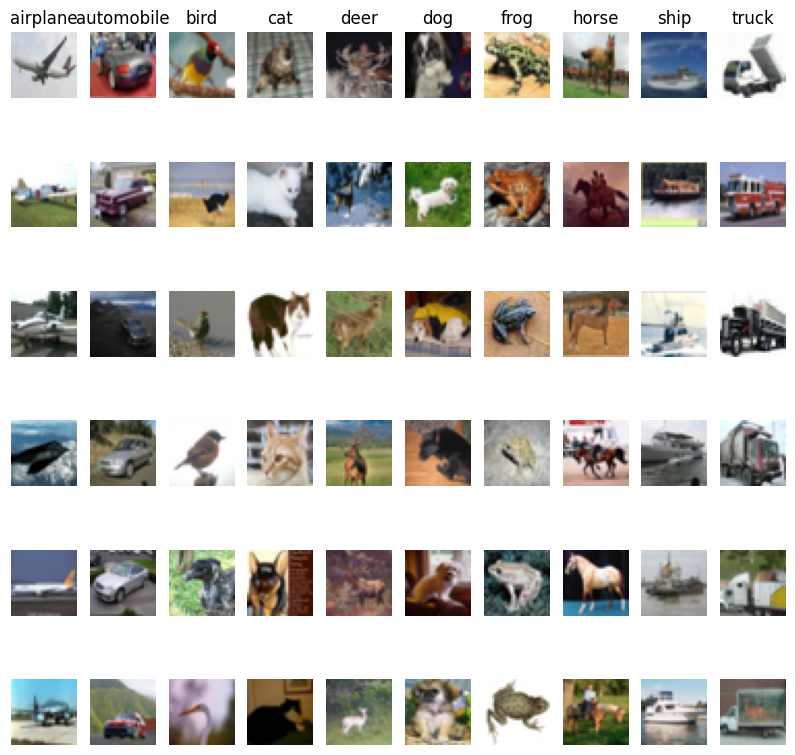

In [35]:
fig_width = 10
fig_height = 10

# Create a figure with the desired size
plt.figure(figsize=(fig_width, fig_height), dpi=100)
from dataset import visualize_cifar_data
visualize_cifar_data(images=x_train.transpose(0, 2, 3, 1), labels=y_train, samples_per_class=6)

## <font color='blue'>2. Nearest neighbor classification on CIFAR-10</font>

In this part, we will investigate the classification problem by training and testing a nearest neighbor classifier on CIFAR-10 dataset with **Euclidean (L2) distance**. 

Function `run_nearest_neighbor`, shown in the next cell, takes a labeled training set (`x_train`, `y_train`) and test set (`x_test`, `y_test`), and applies 1-nearest neighbor classification to the test points, using `KNeighborsClassifier` from `sklearn`. It prints out the accuracy on the test set and returns the classifier.


In [170]:
from sklearn.neighbors import KNeighborsClassifier

def run_nearest_neighbor(x_train, y_train, x_test, y_test):
    # create classifier
    nn_classifier = KNeighborsClassifier(n_neighbors=1, algorithm='auto')
    
    # train 
    nn_classifier.fit(x_train, y_train)

    # test and report accuracy
    test_acc = nn_classifier.score(x_test, y_test)
    print("Nearest neighbor accuracy on the test set: %f"%test_acc)
    
    return nn_classifier

### Nearest neighbor on raw pixels

Now we do nearest neighbor classification in the raw pixel space. 


Call function `compute_or_load_features` to extract the raw pixels as features and call function `run_knn` to train and test nearest neighbor classifier in this feature space. <font color='magenta'>To do: Report the test accuracy you get.</font>

In [171]:
from extract_feature import compute_or_load_features

# compute or load features
raw_pixel_train_features, raw_pixel_test_features = compute_or_load_features(x_train, x_test, "raw_pixel")

# run knn
raw_pixel_knn_classifier = run_nearest_neighbor(raw_pixel_train_features, y_train, raw_pixel_test_features, y_test)

======> Done with computation of raw pixel features
======> Saved train and test features to  /Users/williamearley/Quarter 4/features/raw_pixel.pkl
Training feature shape:  (50000, 3072)
Test feature shape:  (10000, 3072)
Nearest neighbor accuracy on the test set: 0.353900


In [45]:
train_feat, test_feat = compute_or_load_features(x_train, x_test, feature_type='raw_pixel')

======> Loaded train and test features from  /Users/williamearley/Quarter 4/features/raw_pixel.pkl
Training feature shape:  (50000, 3072)
Test feature shape:  (10000, 3072)


In [46]:
pix_nn = run_nearest_neighbor(train_feat, y_train, test_feat, y_test)

Nearest neighbor accuracy on the test set: 0.353900


To get a sense of how the images are distributed locally in the pixel space, we can look at their nearest neighbors. 

<font color='magenta'>To do: Write code in the following block to do the following. Make your code modular so that it can be re-used for the representations we will consider.</font>
* <font color='magenta'>Show the first five images in the test set whose label is correctly predicted by 1-NN, and show the nearest neighbor (in the training set) of each of these images.</font>
* <font color='magenta'>Show the first five images in the test set whose label is incorrectly predicted by 1-NN, and show the nearest neighbor (in the training set) of each of the images.</font>


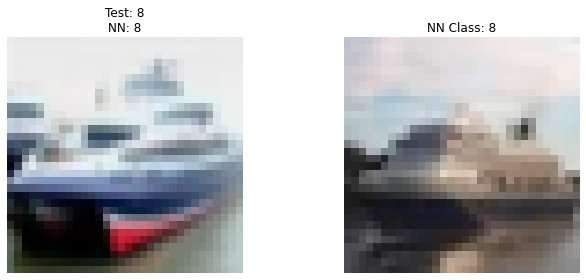

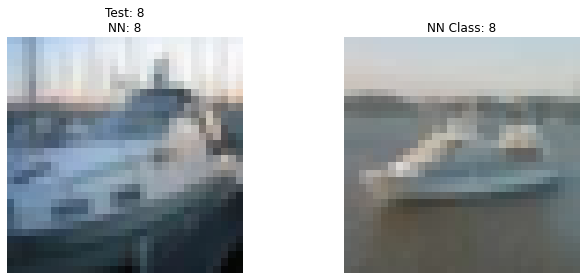

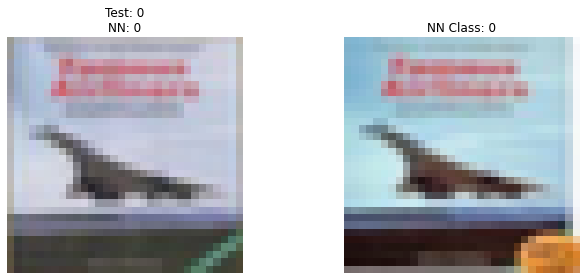

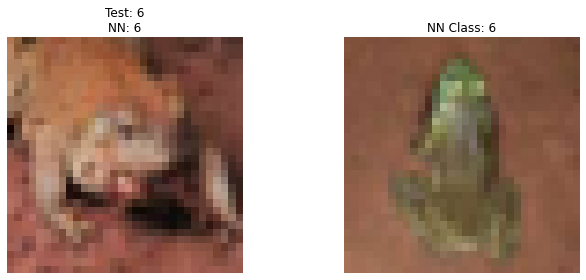

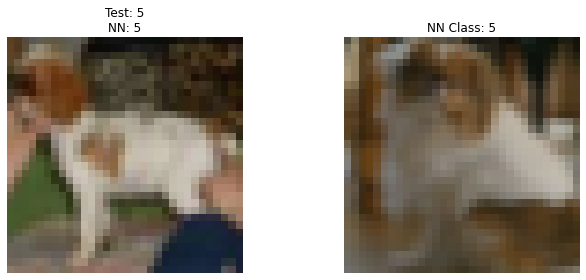

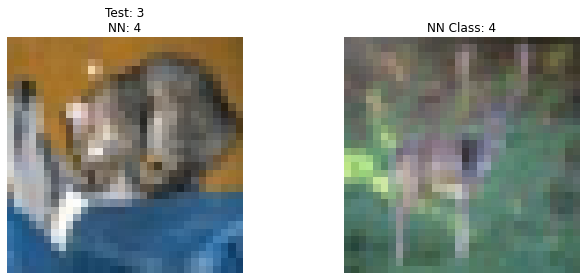

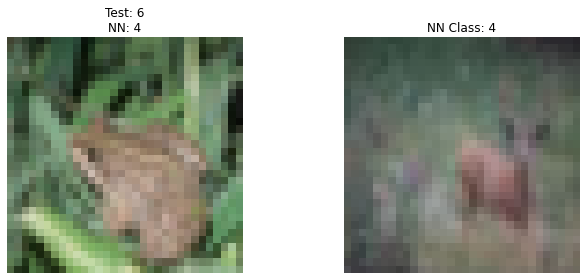

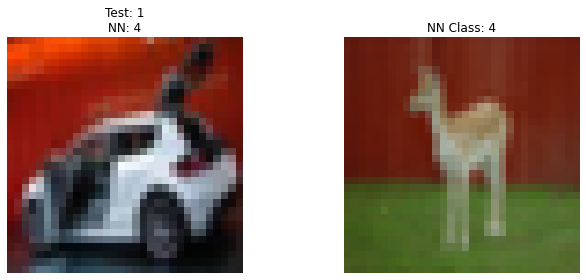

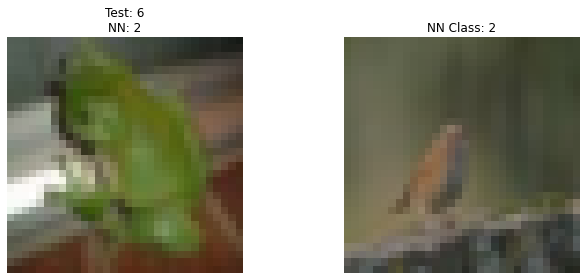

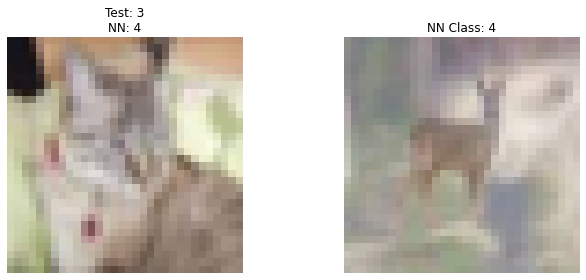

In [94]:
# Seeing if I should be doing the images for the raw_pixel_knn_classifier specifically, the one made above

#knn_classifier = train_knn_classifier(x_train, y_train)

visualize_predictions_and_neighbors(raw_pixel_knn_classifier, x_test, y_test, x_train, y_train, num_samples=5)

In [82]:
def train_knn_classifier(x_train, y_train):
        knn = KNeighborsClassifier(n_neighbors=1)
        knn.fit(x_train.reshape(x_train.shape[0], -1), y_train)
        return knn
    
def find_nn(knn, image):
    return knn.kneighbors([image.flatten()], n_neighbors=1)[1][0][0]

def visualize_image_pairs(image_pairs, titles, neighbor_images=None, neighbor_titles=None, figsize=(10,4)):
    num_images = len(image_pairs)
    
    plt.clf()
    
    fig, axes = plt.subplots(1, num_images, figsize=figsize)
    
    for i in range(num_images):
        ax = axes[i]
        image = np.transpose(image_pairs[i], (1, 2, 0))  # Transpose dimensions for RGB images
        ax.imshow(image)
        ax.set_title(titles[i])
        ax.axis('off')
        
    if neighbor_images is not None:
            ax = axes[1][i]
            neighbor_image = np.transpose(neighbor_images[i], (1, 2, 0))
            ax.imshow(neighbor_image)
            ax.set_title(neighbor_titles[i])
            ax.axis('off')
    
    plt.tight_layout()
    plt.show()
    
def visualize_predictions_and_neighbors(knn, x_test, y_test, x_train, y_train, num_samples=5):
    correct_predictions = []
    incorrect_predictions = []
    
    correct_image_pairs = []
    correct_neighbor_images = []
    correct_neighbor_titles = []
    
    incorrect_image_pairs = []
    incorrect_neighbor_images = []
    incorrect_neighbor_titles = []
    
    for i in range(len(x_test)):
        prediction = knn.predict([x_test[i].flatten()])[0]
        
        if prediction == y_test[i]:
            correct_predictions.append(i)
        else:
            incorrect_predictions.append(i)
            
        if len(correct_predictions) >= num_samples and len(incorrect_predictions) >= num_samples:
            break
    
    for idx in correct_predictions[:num_samples]:
        nn_index = find_nn(knn, x_test[idx])
        correct_image_pairs.append((x_test[idx], y_test[idx], x_train[nn_index], y_train[nn_index]))
        correct_neighbor_images.append(x_train[nn_index])
        correct_neighbor_titles.append(f"NN Class: {y_train[nn_index]}")
        
    for idx in incorrect_predictions[:num_samples]:
        nn_index = find_nn(knn, x_test[idx])
        incorrect_image_pairs.append((x_test[idx], y_test[idx], x_train[nn_index], y_train[nn_index]))
        incorrect_neighbor_images.append(x_train[nn_index])
        incorrect_neighbor_titles.append(f"NN Class: {y_train[nn_index]}")
    
    for i in range(num_samples):
        fig, axes = plt.subplots(1, 2, figsize=(10, 4))
        
        # Plot correct prediction and its neighbor
        ax = axes[0]
        image = np.transpose(correct_image_pairs[i][0], (1, 2, 0))
        ax.imshow(image)
        ax.set_title(f"Test: {correct_image_pairs[i][1]}\nNN: {correct_image_pairs[i][3]}")
        ax.axis('off')
        
        ax = axes[1]
        neighbor_image = np.transpose(correct_neighbor_images[i], (1, 2, 0))
        ax.imshow(neighbor_image)
        ax.set_title(correct_neighbor_titles[i])
        ax.axis('off')
        
        plt.tight_layout()
        plt.show()
    
    for i in range(num_samples):
        fig, axes = plt.subplots(1, 2, figsize=(10, 4))
        
        # Plot incorrect prediction and its neighbor
        ax = axes[0]
        image = np.transpose(incorrect_image_pairs[i][0], (1, 2, 0))
        ax.imshow(image)
        ax.set_title(f"Test: {incorrect_image_pairs[i][1]}\nNN: {incorrect_image_pairs[i][3]}")
        ax.axis('off')
        
        ax = axes[1]
        neighbor_image = np.transpose(incorrect_neighbor_images[i], (1, 2, 0))
        ax.imshow(neighbor_image)
        ax.set_title(incorrect_neighbor_titles[i])
        ax.axis('off')
        
        plt.tight_layout()
        plt.show()

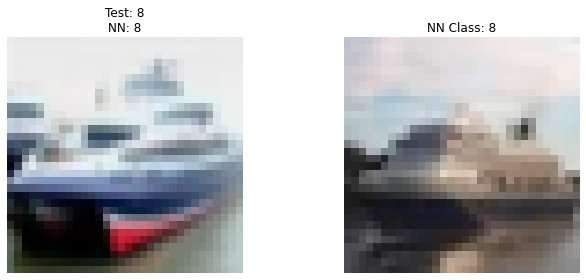

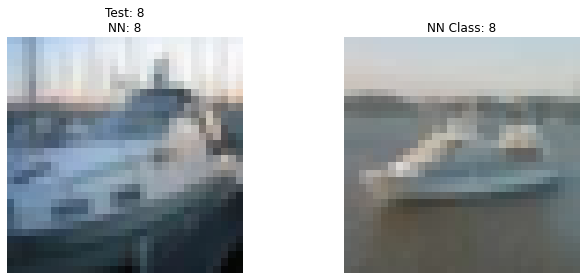

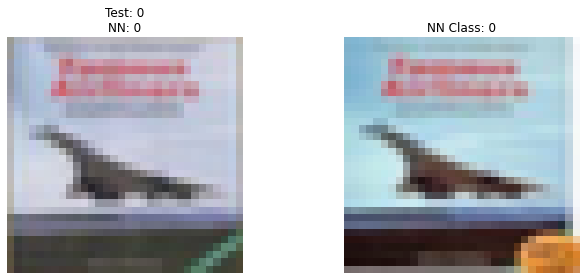

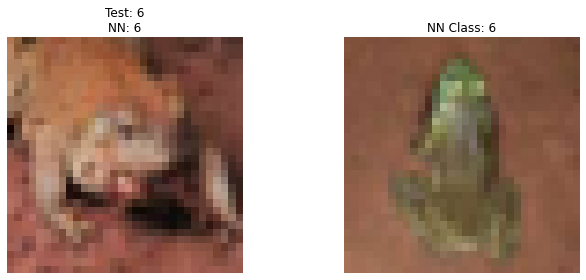

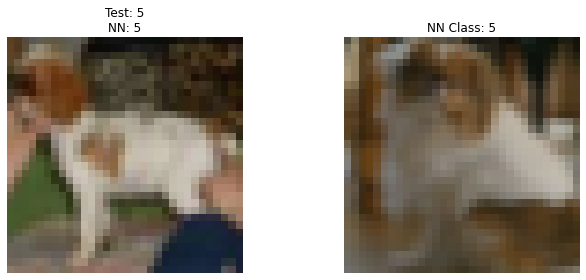

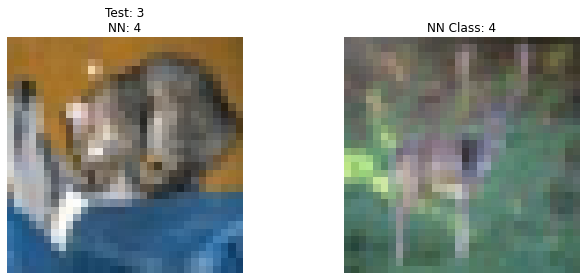

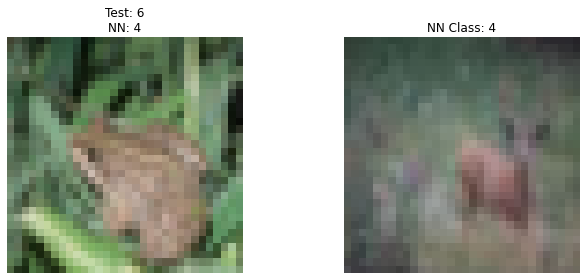

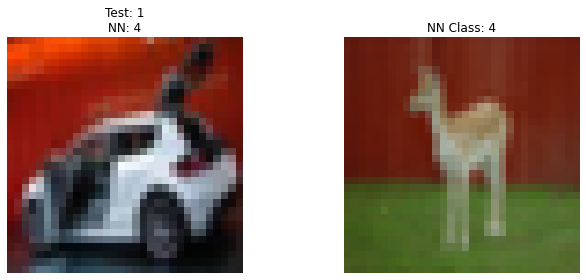

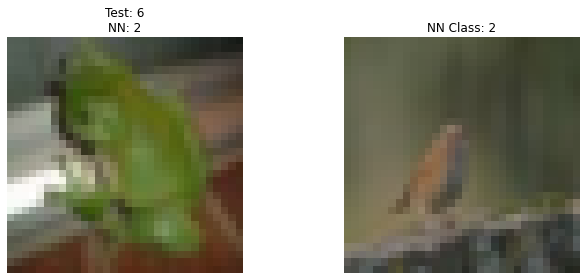

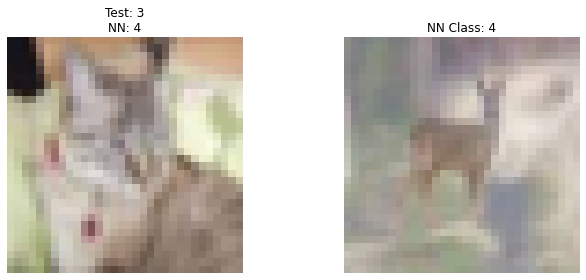

In [83]:
knn_classifier = train_knn_classifier(x_train, y_train)

visualize_predictions_and_neighbors(knn_classifier, x_test, y_test, x_train, y_train, num_samples=5)

### Nearest neighbor on HOG features 
The HOG (Histogram of Oriented Gradients) descriptor computes local statistics of gradients in an image and uses them as feature respresentations. Train and test a nearest neighbor classifier on HOG features. 

In [172]:
from extract_feature import compute_or_load_features

# compute or load features
hog_train_features, hog_test_features = compute_or_load_features(x_train, x_test, "hog")
    
# run knn
hog_knn_classifier = run_nearest_neighbor(hog_train_features, y_train, hog_test_features, y_test)

100%|███████| 10000/10000 [00:06<00:00, 1661.28it/s]


======> Done with computation of HoG features
======> Saved train and test features to  /Users/williamearley/Quarter 4/features/hog.pkl
Training feature shape:  (50000, 512)
Test feature shape:  (10000, 512)
Nearest neighbor accuracy on the test set: 0.365700


In [162]:
len(hog_train_features[1])

512

In [144]:
def visualize_predictions_and_neighbors_hog(correct_image_pairs, incorrect_image_pairs, x_train):
    num_correct_samples = len(correct_image_pairs)
    num_incorrect_samples = len(incorrect_image_pairs)
    num_samples = min(num_correct_samples, num_incorrect_samples)
    
    num_cols = num_samples * 2  # Each sample and its nearest neighbor
    
    fig, axes = plt.subplots(2, num_cols, figsize=(16, 4))
    
    for i in range(num_samples):
        # Plot correct prediction and its neighbor
        ax = axes[0, i * 2]
        ax.imshow(correct_image_pairs[i][0].reshape(-1, 1), cmap='gray', aspect='auto')  # Reshape HOG to the appropriate size
        ax.set_title(f"Test: {correct_image_pairs[i][1]}\nNN: {correct_image_pairs[i][3]}")
        ax.axis('off')
        
        ax = axes[0, i * 2 + 1]
        ax.imshow(correct_image_pairs[i][2].reshape(-1, 1), cmap='gray', aspect='auto')  # Reshape HOG to the appropriate size
        ax.set_title(f"NN Class: {correct_image_pairs[i][3]}")
        ax.axis('off')
    
    # Show nearest neighbor images of incorrectly classified samples
    for i in range(num_samples):
        ax = axes[1, i * 2]
        ax.imshow(incorrect_image_pairs[i][0].reshape(-1, 1), cmap='gray', aspect='auto')  # Reshape HOG to the appropriate size
        ax.set_title(f"Test: {incorrect_image_pairs[i][1]}\nNN: {incorrect_image_pairs[i][3]}")
        ax.axis('off')
        
        ax = axes[1, i * 2 + 1]
        ax.imshow(incorrect_image_pairs[i][2].reshape(-1, 1), cmap='gray', aspect='auto')  # Reshape HOG to the appropriate size
        ax.set_title(f"NN Class: {incorrect_image_pairs[i][3]}")
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

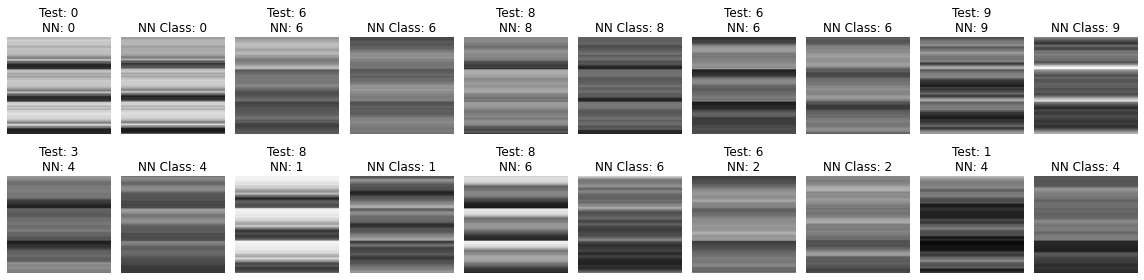

In [145]:
# Visualize the first five correctly classified and 
#first five incorrectly classified images (works for black and white but I need image)
correct_indices = []
incorrect_indices = []

for i in range(len(y_test)):
    if len(correct_indices) >= 5 and len(incorrect_indices) >= 5:
        break

    if hog_predictions[i] == y_test[i] and len(correct_indices) < 5:
        correct_indices.append(i)
    elif hog_predictions[i] != y_test[i] and len(incorrect_indices) < 5:
        incorrect_indices.append(i)

correct_image_pairs = []
incorrect_image_pairs = []

for idx in correct_indices:
    nn_index = hog_knn_classifier.kneighbors([hog_test_features[idx]], n_neighbors=1)[1][0][0]
    correct_image_pairs.append((x_test[idx], y_test[idx], x_train[nn_index], y_train[nn_index]))

for idx in incorrect_indices:
    nn_index = hog_knn_classifier.kneighbors([hog_test_features[idx]], n_neighbors=1)[1][0][0]
    incorrect_image_pairs.append((x_test[idx], y_test[idx], x_train[nn_index], y_train[nn_index]))
    
visualize_predictions_and_neighbors_hog(correct_image_pairs, incorrect_image_pairs, x_train)

In [176]:
correct_indices

[3, 5, 15, 19, 23]

In [185]:
def visualize_predictions_and_neighbors_hog(correct_image_pairs, incorrect_image_pairs, x_train):
    num_correct_samples = len(correct_image_pairs)
    num_incorrect_samples = len(incorrect_image_pairs)
    num_samples = min(num_correct_samples, num_incorrect_samples)
    
    num_cols = num_samples * 4  # Each sample, its nearest neighbor, original image, and neighbor's original image
    
    fig, axes = plt.subplots(2, num_cols, figsize=(20, 10))
    #fig, axes = plt.subplots(2, num_cols, figsize=(num_cols * image_size[0], 2 * image_size[1]))
    
    for i in range(num_samples):
        # Plot correct prediction and its neighbor (HOG representation)
        ax = axes[0, i * 4]
        ax.imshow(correct_image_pairs[i][0].reshape(-1, 1), cmap='gray', aspect='auto')  # Reshape HOG to the appropriate size
        ax.set_title(f"Test: {correct_image_pairs[i][1]}\nNN: {correct_image_pairs[i][3]}")
        ax.axis('off')
        
        ax = axes[0, i * 4 + 1]
        ax.imshow(correct_image_pairs[i][2].reshape(-1, 1), cmap='gray', aspect='auto')  # Reshape HOG to the appropriate size
        ax.set_title(f"NN Class: {correct_image_pairs[i][3]}")
        ax.axis('off')

        # Plot original image and its neighbor's original image
        ax = axes[0, i * 4 + 2]
        ax.imshow(np.transpose(x_test[correct_image_pairs[i][1]], (1, 2, 0)))  # Display original image (transpose dimensions)
        ax.set_title(f"Original Image")
        ax.axis('off')

        ax = axes[0, i * 4 + 3]
        ax.imshow(np.transpose(x_train[correct_image_pairs[i][3]], (1, 2, 0)))  # Display neighbor's original image (transpose dimensions)
        ax.set_title(f"Neighbor's Original Image")
        ax.axis('off')
   
    # Show nearest neighbor images of incorrectly classified samples
    for i in range(num_samples):
        ax = axes[1, i * 4]
        ax.imshow(incorrect_image_pairs[i][0].reshape(-1, 1), cmap='gray', aspect='auto')  # Reshape HOG to the appropriate size
        ax.set_title(f"Test: {incorrect_image_pairs[i][1]}\nNN: {incorrect_image_pairs[i][3]}")
        ax.axis('off')
        
        ax = axes[1, i * 4 + 1]
        ax.imshow(incorrect_image_pairs[i][2].reshape(-1, 1), cmap='gray', aspect='auto')  # Reshape HOG to the appropriate size
        ax.set_title(f"NN Class: {incorrect_image_pairs[i][3]}")
        ax.axis('off')

        # Plot original image and its neighbor's original image
        ax = axes[1, i * 4 + 2]
        ax.imshow(np.transpose(x_test[incorrect_image_pairs[i][1]], (1, 2, 0)))  # Display original image (transpose dimensions)
        ax.set_title(f"Original Image")
        ax.axis('off')

        ax = axes[1, i * 4 + 3]
        ax.imshow(np.transpose(x_train[incorrect_image_pairs[i][3]], (1, 2, 0)))  # Display neighbor's original image (transpose dimensions)
        ax.set_title(f"Neighbor's Original Image")
        ax.axis('off')
   
    plt.tight_layout()
    plt.show()



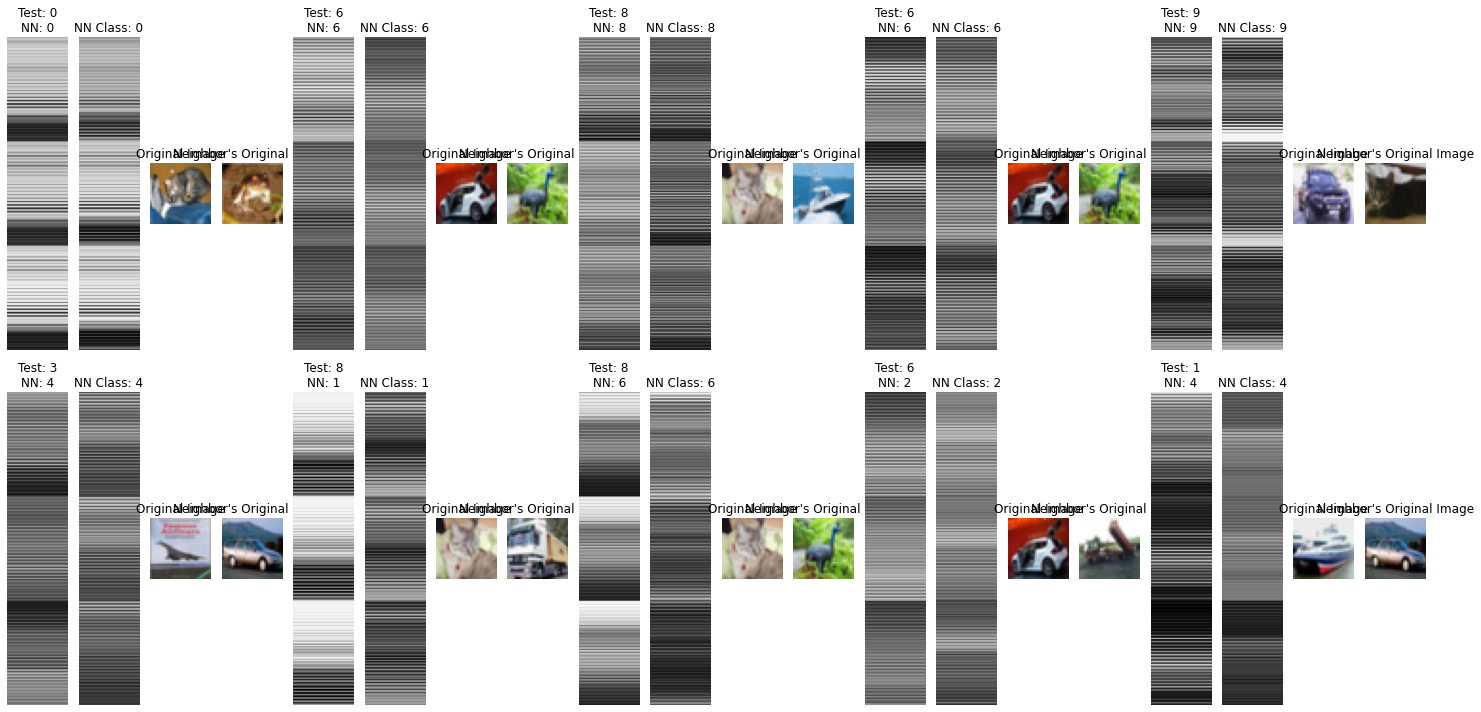

In [186]:
visualize_predictions_and_neighbors_hog(correct_image_pairs, incorrect_image_pairs, x_train)

In [199]:
def visualize_predictions_and_neighbors_images(correct_image_pairs, incorrect_image_pairs, x_train, image_size=(8, 8)):
    num_correct_samples = len(correct_image_pairs)
    num_incorrect_samples = len(incorrect_image_pairs)
    num_samples = min(num_correct_samples, num_incorrect_samples)
    
    num_cols = num_samples * 2  # Each sample and its nearest neighbor
    
    # Adjust the size of the figure here
    #fig, axes = plt.subplots(2, num_cols, figsize=(num_cols * image_size[0], 2 * image_size[1]))
    fig, axes = plt.subplots(2, num_cols, figsize=(20, 6))
        
    for i in range(num_samples):
        # Plot original image and its neighbor's original image
        ax = axes[0, i * 2]
        ax.imshow(np.transpose(x_test[correct_image_pairs[i][1]], (1, 2, 0)))  # Display original image (transpose dimensions)
        ax.set_title(f"Original Image")
        ax.axis('off')

        ax = axes[0, i * 2 + 1]
        ax.imshow(np.transpose(x_train[correct_image_pairs[i][3]], (1, 2, 0)))  # Display neighbor's original image (transpose dimensions)
        ax.set_title(f"Neighbor's Original Image")
        ax.axis('off')
   
    # Show nearest neighbor images of incorrectly classified samples
    for i in range(num_samples):
        ax = axes[1, i * 2]
        ax.imshow(np.transpose(x_test[incorrect_image_pairs[i][1]], (1, 2, 0)))  # Display original image (transpose dimensions)
        ax.set_title(f"Original Image")
        ax.axis('off')

        ax = axes[1, i * 2 + 1]
        ax.imshow(np.transpose(x_train[incorrect_image_pairs[i][3]], (1, 2, 0)))  # Display neighbor's original image (transpose dimensions)
        ax.set_title(f"Neighbor's Original Image")
        ax.axis('off')
   
    plt.tight_layout()
    plt.show()


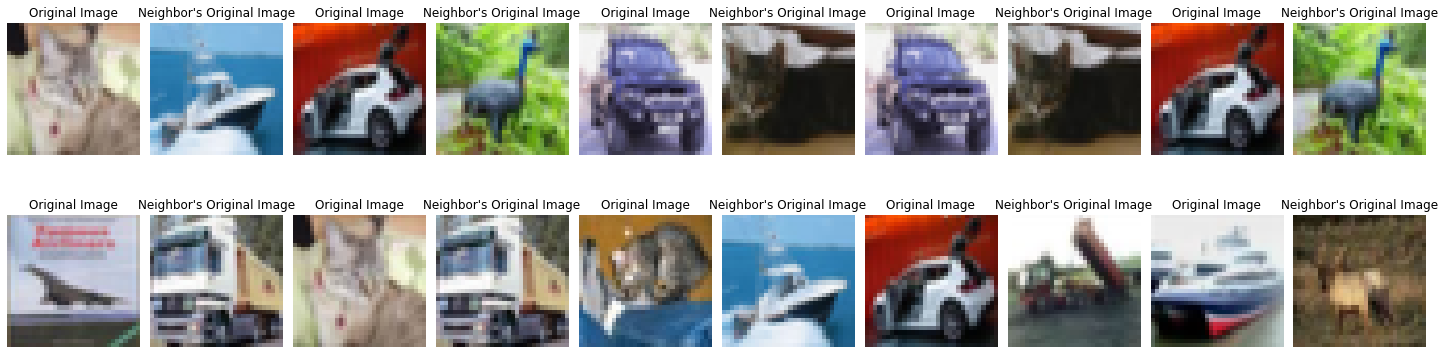

In [200]:
visualize_predictions_and_neighbors_images(correct_image_pairs, incorrect_image_pairs, x_train)

In [107]:
hog_predictions = hog_knn_classifier.predict(hog_test_features)

In [110]:
from sklearn.metrics import accuracy_score
hog_accuracy = accuracy_score(y_test, hog_predictions)
print(f"HOG Features Test Accuracy: {hog_accuracy * 100:.2f}%")

HOG Features Test Accuracy: 36.57%


In [86]:
len(hog_train_features)

50000

In [96]:
hog_train_features.shape

(50000, 512)

In [97]:
hog_test_features.shape

(10000, 512)

In [98]:
x_train.shape

(50000, 3, 32, 32)

In [ ]:
knn_classifier = train_knn_classifier(x_train, y_train)

visualize_predictions_and_neighbors(knn_classifier, x_test, y_test, x_train, y_train, num_samples=5)

In [90]:
len(x_test)

10000

In [101]:
hog_knn_classifier = KNeighborsClassifier(n_neighbors=1)
hog_knn_classifier.fit(hog_train_features, y_train)

KNeighborsClassifier(n_neighbors=1)

### Nearest neighbor on CNN features

Over the past decade, deep <em>convolutional neural networks</em> (CNNs) have become building blocks in a wide range of computer vision tasks. A CNN trained on a large scale image classification task learns to extract spatial hierarchies of features from edges to object parts [2].  

In this problem, we will explore the representations learned by CNNs on different layers. We will be using [VGG](https://arxiv.org/abs/1409.1556) as our convolutional network architecture. 

A VGG network is composed of a sequence of convolutional layers, pooling layers, and fully connected layers. To clearly understand its architecture, we provide you with a helper function visualizing the layers and input/output shapes. The following code feeds a batch of 32 × 32 × 3 images into VGG11 network and do a forward pass. Run the code and check the summary. 

In [146]:
from torchinfo import summary
from vgg_network import vgg11_bn

vgg_model = vgg11_bn(pretrained=False)
summary(vgg_model, input_size=(16, 3, 32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
VGG                                      [16, 10]                  --
├─Sequential: 1-1                        [16, 512, 1, 1]           --
│    └─Conv2d: 2-1                       [16, 64, 32, 32]          1,792
│    └─BatchNorm2d: 2-2                  [16, 64, 32, 32]          128
│    └─ReLU: 2-3                         [16, 64, 32, 32]          --
│    └─MaxPool2d: 2-4                    [16, 64, 16, 16]          --
│    └─Conv2d: 2-5                       [16, 128, 16, 16]         73,856
│    └─BatchNorm2d: 2-6                  [16, 128, 16, 16]         256
│    └─ReLU: 2-7                         [16, 128, 16, 16]         --
│    └─MaxPool2d: 2-8                    [16, 128, 8, 8]           --
│    └─Conv2d: 2-9                       [16, 256, 8, 8]           295,168
│    └─BatchNorm2d: 2-10                 [16, 256, 8, 8]           512
│    └─ReLU: 2-11                        [16, 256, 8, 8]           --


### Nearest neighbor on pretrained CNN features

As shown in the summary above, a VGG net consists of three components: 
1. A sequence of convolutional blocks (1-1 and 1-2)
2. Two fully connected blocks (2-30 to 2-35)
3. A single fully connected layer (2-36)

The first two components together act as a feature extractor. The convolutional blocks extract the low-level and intermediate-level features, and the fully connected blocks extract the high-level features. The third component is a single linear layer mapping the feature vectors to the classes therefore can be viewed as a linear classifier. 

In this problem, we will experiment with features extracted by a pretrained VGG net at two specific layers:
1. `last_conv`: AdaptiveAvgPool2d (1-2)
2. `last_fc`: ReLU (2-34)

Train and test a nearest neighbor classifier on pretrained VGG features at these two layers respectively (Set parameter `layer` of function `compute_or_load_features` to `last_conv` or `last_fc`). <font color='magenta'>Report the test accuracies with these two representations. For `last_fc`, show the first five correctly classified images (with nearest neighbors) and the first five incorrectly classified.</font>

In [194]:
from extract_feature import compute_or_load_features
from vgg_network import vgg11_bn, test_pretrained_vgg


# compute or load features
pretrained_cnn_last_conv_train_features, pretrained_cnn_last_conv_test_features = compute_or_load_features(x_train, x_test, "pretrained_cnn", "last_conv")

# run knn
pretrained_cnn_last_conv_knn_classifier = run_nearest_neighbor(pretrained_cnn_last_conv_train_features, y_train, pretrained_cnn_last_conv_test_features, y_test)

100%|█████████████| 100/100 [00:17<00:00,  5.68it/s]


======> Done with computation of CNN features
======> Saved train and test features to  /Users/williamearley/Quarter 4/features/pretrained_cnn_last_conv.pkl
Training feature shape:  (50000, 512)
Test feature shape:  (10000, 512)
Nearest neighbor accuracy on the test set: 0.920000


In [195]:
from extract_feature import compute_or_load_features

# compute or load features
pretrained_cnn_last_fc_train_features, pretrained_cnn_last_fc_test_features = compute_or_load_features(x_train, x_test, "pretrained_cnn", "last_fc")

# run knn
pretrained_cnn_last_fc_knn_classifier = run_nearest_neighbor(pretrained_cnn_last_fc_train_features, y_train, pretrained_cnn_last_fc_test_features, y_test)

100%|█████████████| 100/100 [00:20<00:00,  4.79it/s]


======> Done with computation of CNN features
======> Saved train and test features to  /Users/williamearley/Quarter 4/features/pretrained_cnn_last_fc.pkl
Training feature shape:  (50000, 4096)
Test feature shape:  (10000, 4096)
Nearest neighbor accuracy on the test set: 0.920700


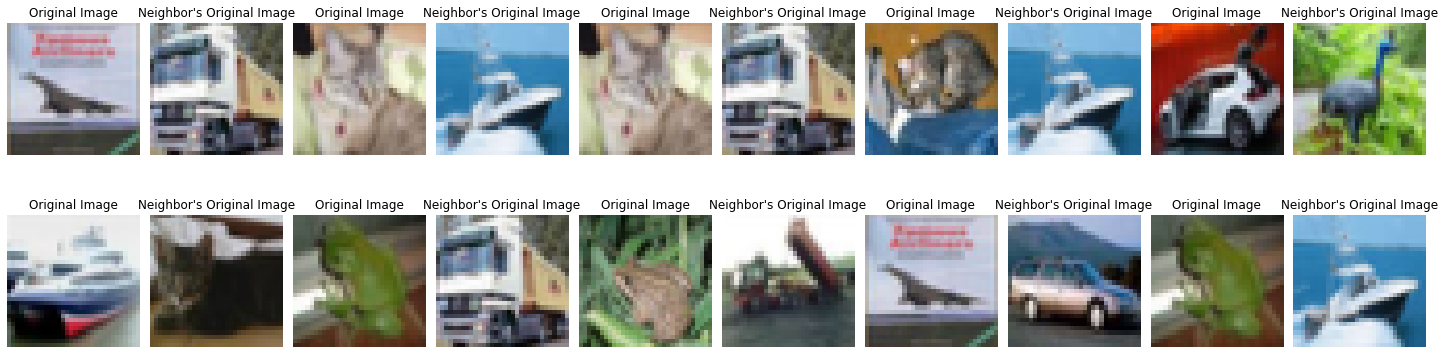

In [217]:
visualize_predictions_and_neighbors_images(correct_image_pairs_last, incorrect_image_pairs_last, x_train)

### Alignment between nearest neighbor classifier and pretrained CNN model
In the following block, call function `test_pretrained_vgg` from `vgg_network.py`. The function will test the pretrained VGG net on the test images of CIFAR-10 and return the test accuracy. Report this accuracy and compare it with the test accuracy of nearest neighbor classifier in pretrained `last conv` and `last fc` feature space. In which space does the nearest neighbor classifier behave the most similarly to a pretrained CNN model?

In [196]:
from vgg_network import test_pretrained_vgg

test_acc = test_pretrained_vgg(x_test, y_test)
print('Accuracy on the test images: ', test_acc) 

Accuracy on the test images:  0.9225


### Nearest neighbor on random CNN features

The excellent feature extraction ability of ConvNets enables them to solve computer vision problems in a universal way. One may think that this is because ConvNets are generally trained on large datasets of images. But is this the only reason?  To answer this question, a recent work Deep Image Prior [1] shows that the structure of a CNN is sufficient to capture a great deal of low-level image statistics prior to any learning. A randomly initialized fully-convolutional neural network is already able to achieve good results in standard image reconstruction problems such as denoising, super-resolution, and inpainting. 

In this problem, we will investigate whether the inductive bias captured by the ConvNets also helps for image classification problems.

You will train and test the nearest neighbor classifier on the features extracted by a randomly initialized VGG network. <font color='magenta'>To do: Experiment with two feature spaces `last conv` and `last fc`, and report the test accuracies.</font>  

In [158]:
from extract_feature import compute_or_load_features

# compute or load features
random_cnn_last_conv_train_features, random_cnn_last_conv_test_features = compute_or_load_features(x_train, x_test, "random_cnn", "last_conv")

# run knn
random_cnn_last_conv_knn_classifier = run_nearest_neighbor(random_cnn_last_conv_train_features, y_train, random_cnn_last_conv_test_features, y_test)

100%|███████████| 100/100 [00:17<00:00,  5.74it/s]


======> Done with computation of CNN features
======> Saved train and test features to  /Users/williamearley/Quarter 4/features/random_cnn_last_conv.pkl
Training feature shape:  (50000, 512)
Test feature shape:  (10000, 512)
Nearest neighbor accuracy on the test set: 0.414900


In [156]:
from extract_feature import compute_or_load_features

# compute or load features
random_cnn_last_fc_train_features, random_cnn_last_fc_test_features = compute_or_load_features(x_train, x_test, "random_cnn", "last_fc")

# run knn
random_cnn_last_fc_knn_classifier = run_nearest_neighbor(random_cnn_last_fc_train_features, y_train, random_cnn_last_fc_test_features, y_test)

100%|█████████| 100/100 [00:20<00:00,  4.84it/s]


======> Done with computation of CNN features
======> Saved train and test features to  /Users/williamearley/Quarter 4/features/random_cnn_last_fc.pkl
Training feature shape:  (50000, 4096)
Test feature shape:  (10000, 4096)
Nearest neighbor accuracy on the test set: 0.389300


Compare the test accuracies of nearest neighbor classifier on random `last conv` features and HOG features. In which representation space does it perform better?

The model performed better on last conv.

Compare the test accuracies of nearest neighbor classifier on random `last conv` features and random `last fc` features. In which representation space does it perform better?

The model performed better on last conv.

In [218]:
knn_predictions_last = pretrained_cnn_last_fc_knn_classifier.predict(pretrained_cnn_last_fc_test_features)

correct_indices_last = []
incorrect_indices_last = []

# find the first 5 correct and incorrect
for i in range(len(y_test)):
    if len(correct_indices_last) >= 5 and len(incorrect_indices_last) >= 5:
        break
        
    if knn_predictions_last[i] == y_test[i] and len(correct_indices_last) < 5:
        correct_indices_last.append(i)
    elif knn_predictions_last[i] != y_test[i] and len(incorrect_indices_last) < 5:
        incorrect_indices_last.append(i)
        
correct_image_pairs_last = []
incorrect_image_pairs_last = []

for idx in correct_indices_last:
    nn_index_last = random_cnn_last_fc_knn_classifier.kneighbors([random_cnn_last_fc_test_features[idx]], n_neighbors=1)[1][0][0]
    correct_image_pairs_last.append((x_test[idx], y_test[idx], x_train[nn_index_last], y_train[nn_index_last]))    
    
for idx in incorrect_indices_last:
    nn_index_last = random_cnn_last_fc_knn_classifier.kneighbors([random_cnn_last_fc_test_features[idx]], n_neighbors=1)[1][0][0]
    incorrect_image_pairs_last.append((x_test[idx], y_test[idx], x_train[nn_index_last], y_train[nn_index_last]))
    

In [220]:
incorrect_indices_last

[37, 57, 58, 61, 87]

In [214]:
len(correct_image_pairs_last[1])

4

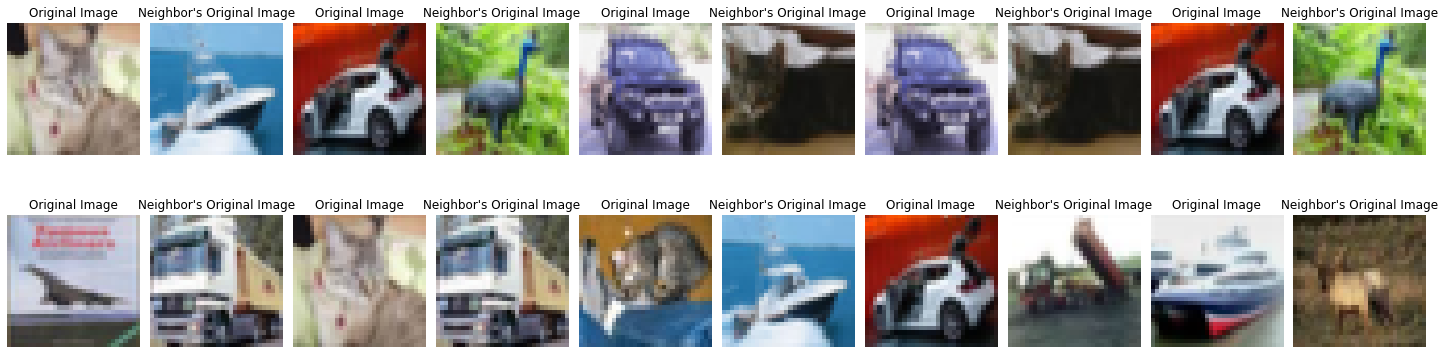

In [210]:
visualize_predictions_and_neighbors_images(correct_image_pairs_last, incorrect_image_pairs_last, x_train)

## References
1. D. Ulyanov, A. Vedaldi, and V. Lempitsky, [Deep Image Prior](https://arxiv.org/pdf/1711.10925.pdf), CVPR 2018.
2. M. Zeiler and R. Fergus, [Visualizing and Understanding Deep Neural Networks](https://arxiv.org/pdf/1311.2901.pdf), ECCV 2014.  

In [221]:
pip install nbconvert[webpdf]


zsh:1: no matches found: nbconvert[webpdf]
Note: you may need to restart the kernel to use updated packages.
